In [67]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random

df_reddit = pd.read_csv('csv/france_all_reddit.csv')
df_meteo = pd.read_csv('csv/meteo_2020_avg.csv')

df_meteo = df_meteo.drop(df_meteo.loc[df_meteo["date"] == "2020-9-31"].index)
df_meteo = df_meteo.drop(df_meteo.loc[df_meteo["date"] == "2020-11-31"].index)

m = 1
while m <= 12:
    d = 1
    while d <= 31:
        date_meteo = "2020-" + str(m) + "-" + str(d)
        date_reddit = "2020-"
        if m < 10:
            date_reddit += "0" + str(m) + "-"
        else:
            date_reddit += str(m) + "-"
        if d < 10:
            date_reddit += "0" + str(d)
        else:
            date_reddit += str(d)
        df_meteo.loc[df_meteo["date"] == date_meteo, "date"] = date_reddit
        d += 1
    m += 1

df = df_reddit.merge(df_meteo, how='inner', on='date')
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(by=["date"])

df.loc[df["condition"] == "Fair", "condition"] = 0
df.loc[df["condition"] == "Partly Cloudy", "condition"] = 1
df.loc[df["condition"] == "Cloudy", "condition"] = 1
df.loc[df["condition"] == "Mostly Cloudy", "condition"] = 2
df.loc[df["condition"] == "Fog", "condition"] = 2
df.loc[df["condition"] == "Mist", "condition"] = 2
df.loc[df["condition"] == "Light Rain", "condition"] = 2
df.loc[df["condition"] == "Light Rain / Windy", "condition"] = 2
df = df.astype({"condition":"int32"})
df

,date,name,score,nb com,temperature C,humidity %,condition
203,2020-03-09,Ok boomer francophone sur r France,488,25,7.955083,77.851064,0
216,2020-03-23,"Thread centralisant les dogwhistling, propos e...",30,11,7.118056,52.666667,0
179,2020-04-01,Pendant ce temps sur r france,810,62,7.500000,47.708333,0
180,2020-04-01,r France moderators decide to follow in the go...,2133,30,7.500000,47.708333,0
181,2020-04-01,r france aujourd'hui,82,4,7.500000,47.708333,0
...,...,...,...,...,...,...,...
29,2020-12-29,Les mods de r france fin,12,2,3.495370,94.479167,2
30,2020-12-29,r France et ses éternels rêves humides sur les...,1,0,3.495370,94.479167,2
28,2020-12-29,Pro-nucléaire random typique de ceux qu'on tro...,0,9,3.495370,94.479167,2
53,2020-12-30,https: /np.reddit.com/r/france/comments/kmwcgs...,1,0,4.255319,89.340426,2


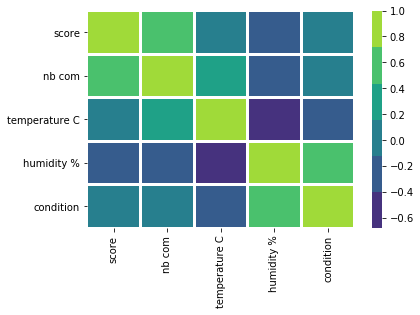

In [45]:
heatmap = df.corr()
sns.heatmap(heatmap, cmap= sns.color_palette('viridis'), linewidths=2)

In [46]:
df.corr()

,score,nb com,temperature C,humidity %,condition
score,1.000000,0.472570,0.027365,-0.173461,-0.087736
nb com,0.472570,1.000000,0.162354,-0.254988,-0.108801
temperature C,0.027365,0.162354,1.000000,-0.681478,-0.335635
humidity %,-0.173461,-0.254988,-0.681478,1.000000,0.591151
condition,-0.087736,-0.108801,-0.335635,0.591151,1.000000


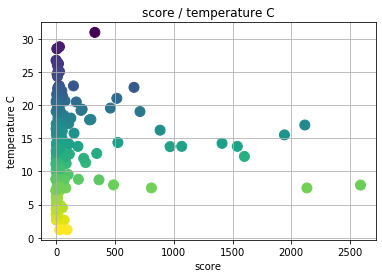

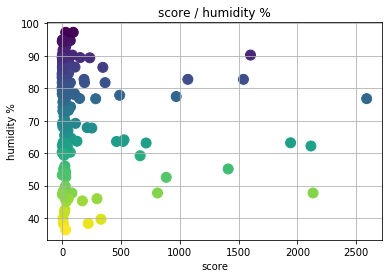

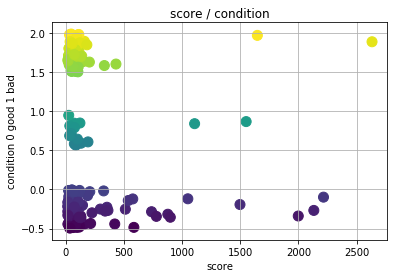

In [68]:
name1 = 'score'
name2 = 'temperature C'
sc = plt.scatter(x=df[name1], y=df[name2], s=100, alpha=1, c=-df[name2])
#sc = plt.scatter(x=df[name1], y=df["condition"], s=100, alpha=1, c=['red'])
plt.xlabel(f"{name1}")
plt.ylabel(f"{name2}")
plt.title(f"{name1} / {name2}")
plt.grid()
plt.show()

name2 = "humidity %"
sc = plt.scatter(x=df[name1], y=df[name2], s=100, alpha=1, c=-df[name2])
plt.xlabel(f"{name1}")
plt.ylabel(f"{name2}")
plt.title(f"{name1} / {name2}")
plt.grid()
plt.show()

name2 = "condition"
tab = []
for i in df[name2]:
    tab.append(i + random.uniform(-0.5, 0))
tab2 = []
for i in df[name1]:
    tab2.append(i + random.uniform(0, 100))
sc = plt.scatter(x=tab2, y=tab, s=100, alpha=1, c=tab)
plt.xlabel(f"{name1}")
plt.ylabel(f"{name2} 0 good 2 bad")
plt.title(f"{name1} / {name2}")
plt.grid()
plt.show()

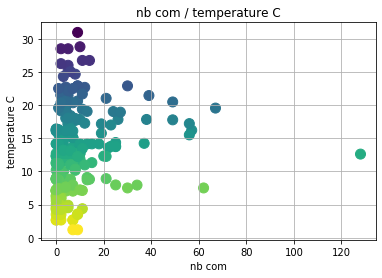

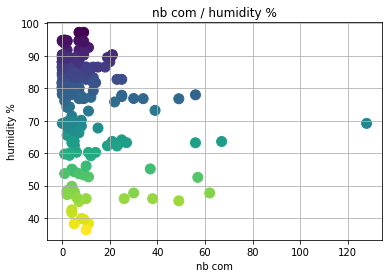

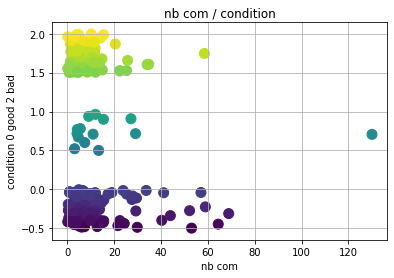

In [71]:
name1 = 'nb com'
name2 = 'temperature C'
sc = plt.scatter(x=df[name1], y=df[name2], s=100, alpha=1, c=-df[name2])
#sc = plt.scatter(x=df[name1], y=df["condition"], s=100, alpha=1, c=['red'])
plt.xlabel(f"{name1}")
plt.ylabel(f"{name2}")
plt.title(f"{name1} / {name2}")
plt.grid()
plt.show()

name2 = "humidity %"
sc = plt.scatter(x=df[name1], y=df[name2], s=100, alpha=1, c=-df[name2])
plt.xlabel(f"{name1}")
plt.ylabel(f"{name2}")
plt.title(f"{name1} / {name2}")
plt.grid()
plt.show()

name2 = "condition"
tab = []
for i in df[name2]:
    tab.append(i + random.uniform(-0.5, 0))
tab2 = []
for i in df[name1]:
    tab2.append(i + random.uniform(0, 5))
sc = plt.scatter(x=tab2, y=tab, s=100, alpha=1, c=tab)
plt.xlabel(f"{name1}")
plt.ylabel(f"{name2} 0 good 2 bad")
plt.title(f"{name1} / {name2}")
plt.grid()
plt.show()

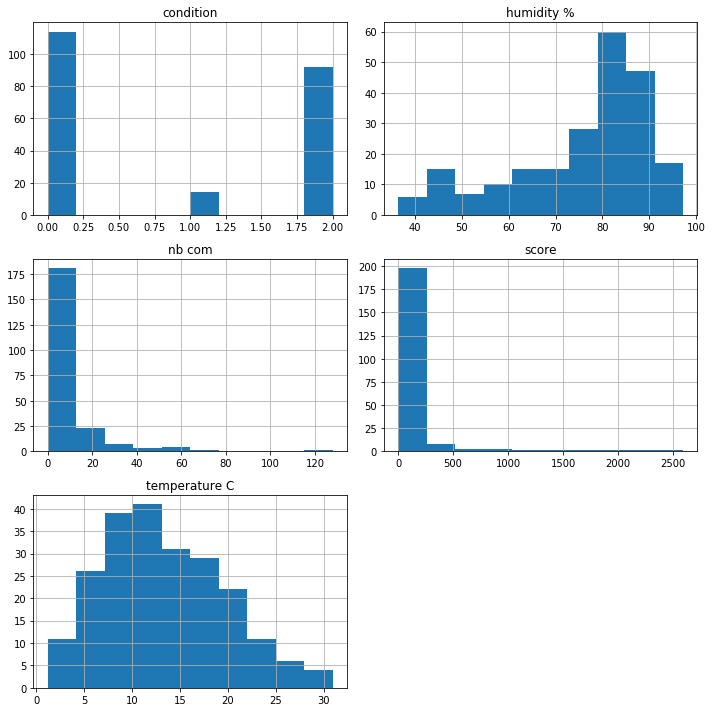

In [70]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()